Logistic Regression Model for Classification of Tumors

In [1]:
#Load the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get data from uci link:
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

df = pd.read_csv('/Users/harsha/Desktop/data.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

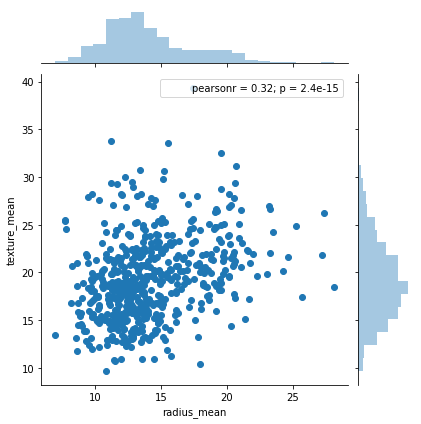

In [12]:
sns.jointplot('radius_mean', 'texture_mean', data=df)


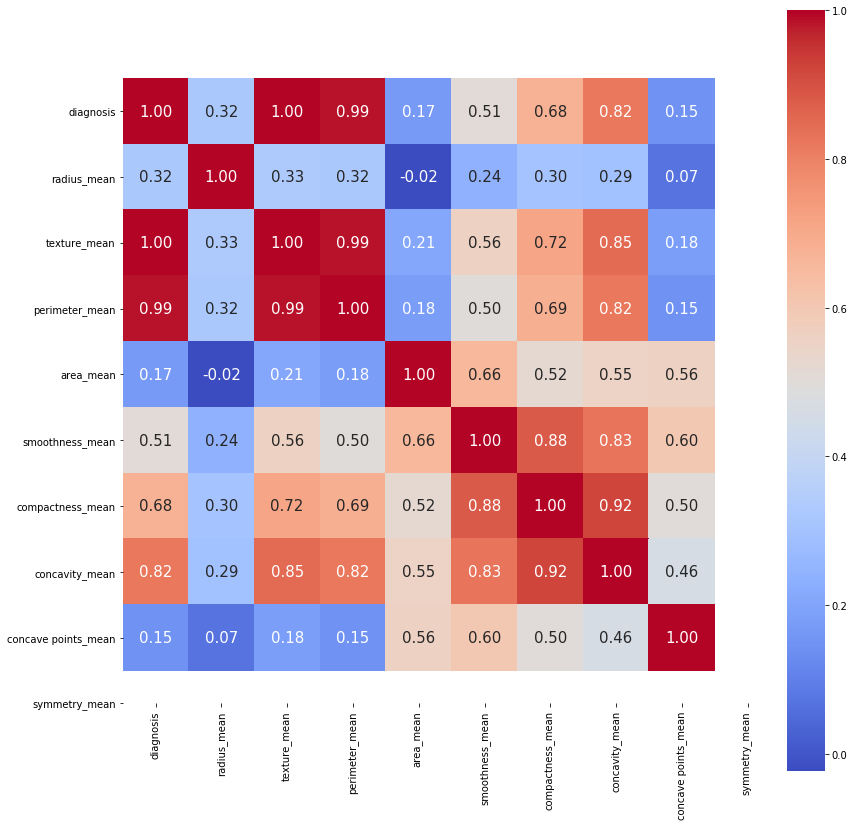

In [39]:
features_mean= list(df.columns[1:11])
corr = df[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')


In [38]:
X = df[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']]
y = df['diagnosis']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression()
glm.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
predictions = glm.predict(X_test)


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


             precision    recall  f1-score   support

          B       0.93      0.94      0.93       105
          M       0.91      0.88      0.89        66

avg / total       0.92      0.92      0.92       171



In [29]:
X_test1=X_test.tail(1)

In [31]:
df.tail(1) # we need ans as B

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,...,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039,NaN


In [34]:
predictions1 = glm.predict(X_test1)
predictions1

array(['B'], dtype=object)

In [43]:
# Random forest
from sklearn.ensemble import RandomForestClassifier 
rfm=RandomForestClassifier(n_estimators=100)# a simple random forest model
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
prediction=rfm.predict(X_test)
print(classification_report(y_test, prediction))


             precision    recall  f1-score   support

          B       0.95      0.98      0.97       105
          M       0.97      0.92      0.95        66

avg / total       0.96      0.96      0.96       171



In [47]:
prediction1=rfm.predict(X_test1)
prediction1

array(['B'], dtype=object)